<a href="https://colab.research.google.com/github/jaicdev/Notebooks/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutorial: Multiclass Logistic Regression on the Iris Dataset


Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


 Load and Prepare the Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

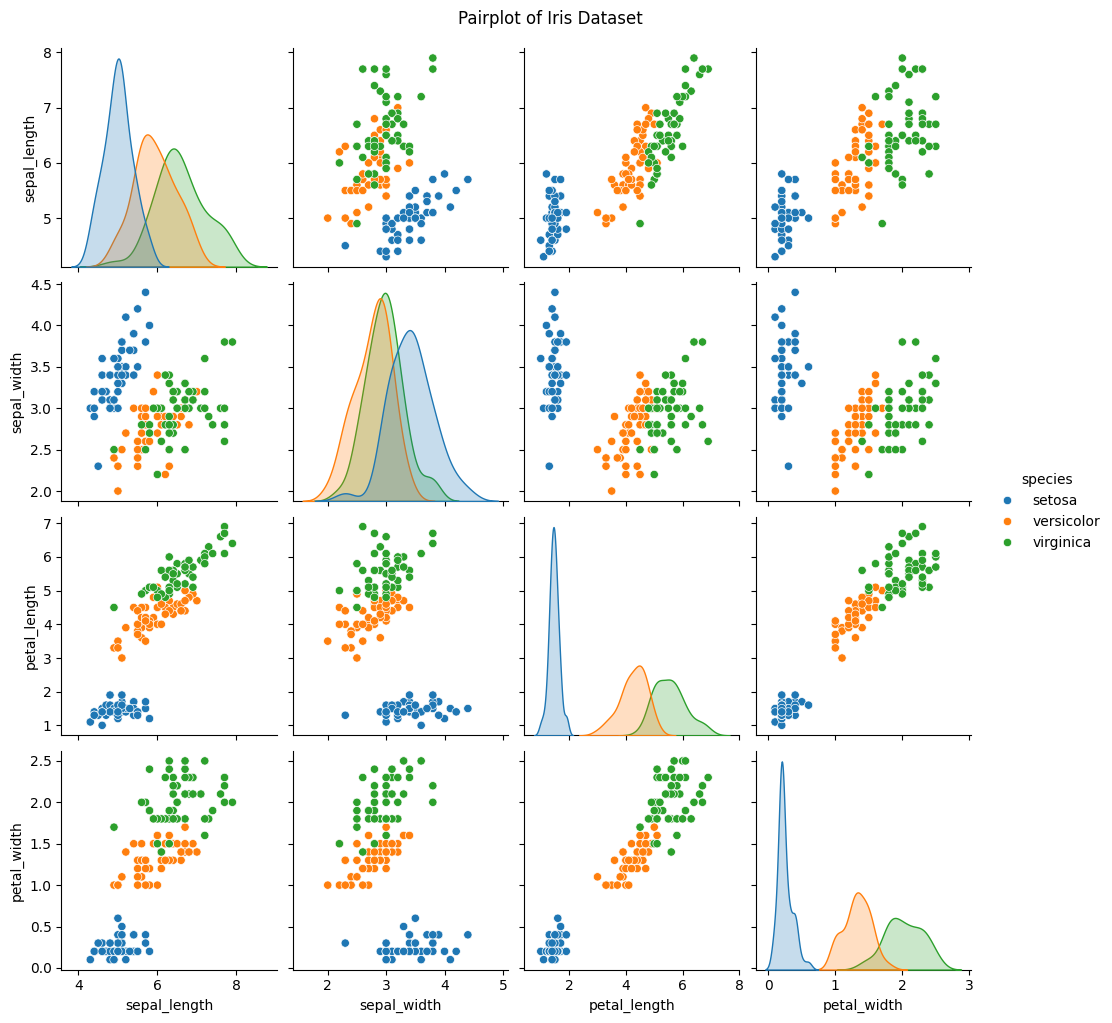

In [3]:
iris_df = sns.load_dataset('iris')
sns.pairplot(iris_df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

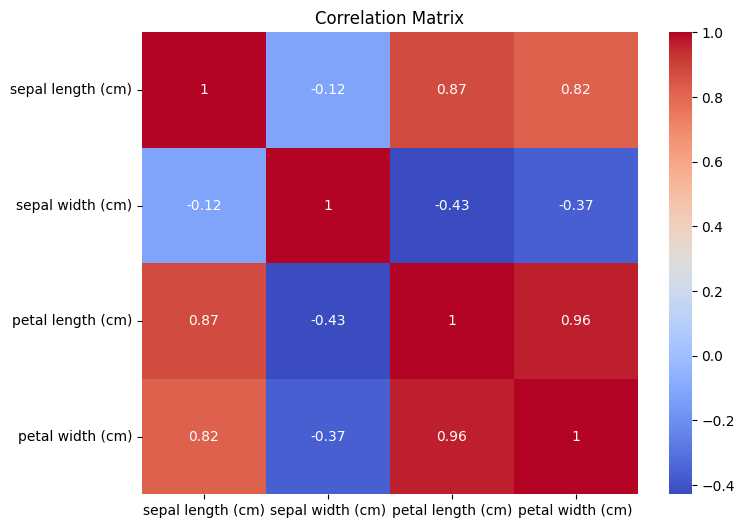

In [4]:
# Compute and visualize correlation matrix
plt.figure(figsize=(8, 6))
corr = np.corrcoef(X, rowvar=False)
sns.heatmap(corr, annot=True, cmap="coolwarm", xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Correlation Matrix')
plt.show()


Feature Scaling


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

Training the Model

In [6]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predict probabilities and class labels
probs_y = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

probs_y = np.round(probs_y, 2)

In [8]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



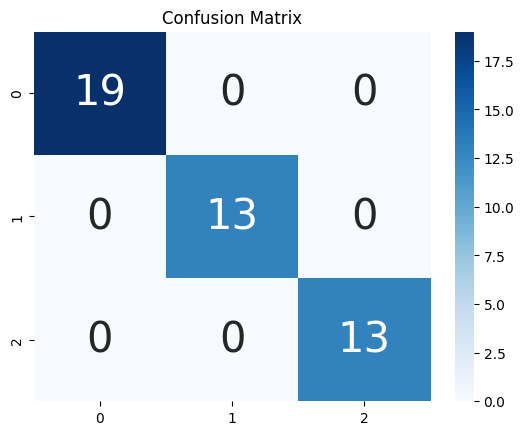

In [9]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()
